In [1]:
import sys
import tensorflow as tf

sys.path.append("/visuworks/Blindless_AIFFELTON/Models")
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Models/Dense_Unet")
import dense_unet

# Insert Path
FILE_NAME = 'dense_unet_256_30ep_aG'
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/history/" + FILE_NAME + '_history' ".json"
SOURCE = "/visuworks/Dataset/Selected Dataset 2"
INPUT_SHAPE = (256, 256, 1)

2024-01-26 05:37:02.125429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 05:37:02.125457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 05:37:02.126356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 05:37:02.131496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 05:37:02.716979: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Create augmentation
train_preproc = preprocess.build_augmentation_for_adaptive()
test_preproc = preprocess.build_augmentation_for_adaptive(is_train=False)

# Create train, test generator
train_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model(INPUT_SHAPE)

2024-01-26 05:37:03.899570: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 05:37:03.933343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 05:37:03.933535: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

2024-01-26 05:23:38.793534: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


125/125 [==============================] - 60s 460ms/step - loss: 0.2456 - sensitivity: 0.7907 - specificity: 0.9693 - accuracy: 0.9587
Loss: 0.24564839899539948
Sensitivity: 0.7907466292381287
Specificity: 0.9692831635475159
Accuracy: 0.9586531519889832


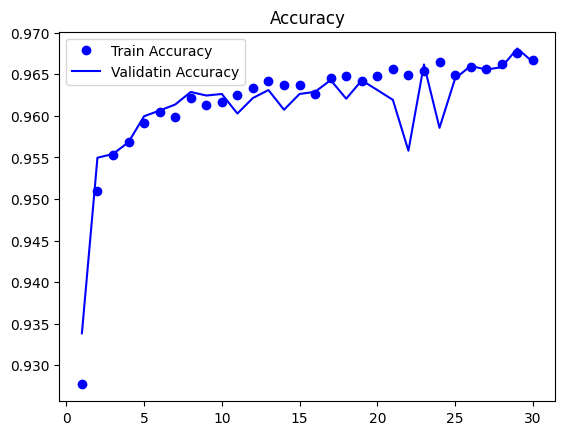

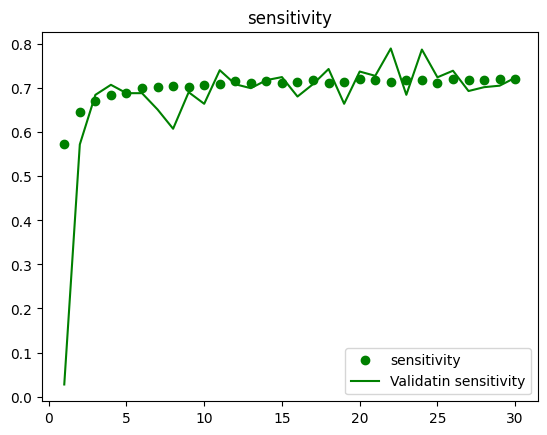

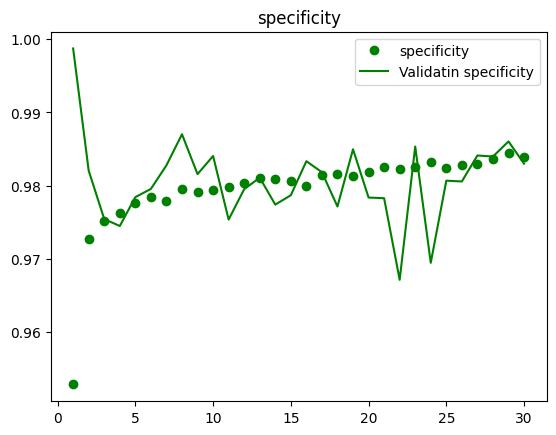

<Figure size 640x480 with 0 Axes>

In [7]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

2024-01-26 05:37:06.739564: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


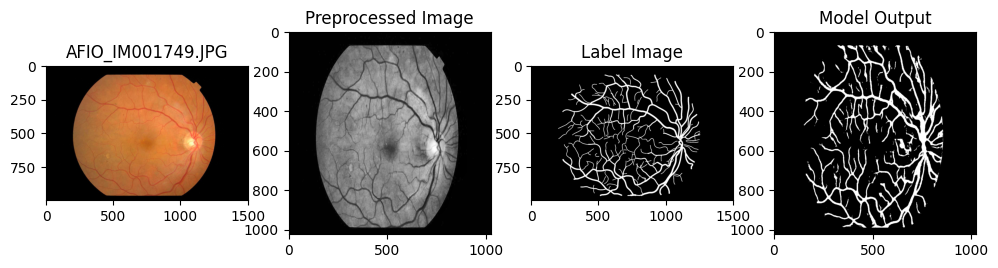

2024-01-26 05:37:24.247944: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-26 05:37:24.482278: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.26GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-26 05:37:24.695149: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-26 05:37:24.926554: W external/local_tsl/tsl/framework/bfc_

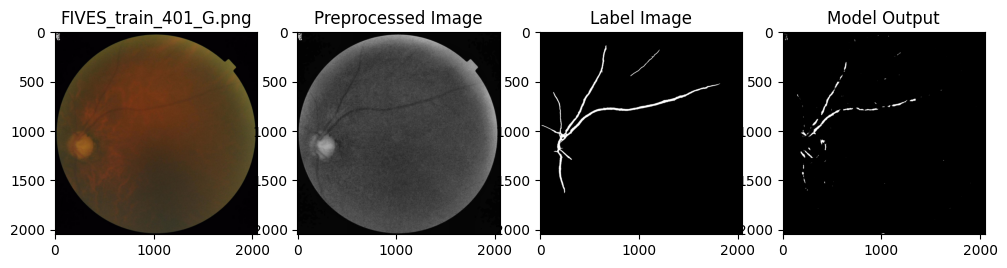

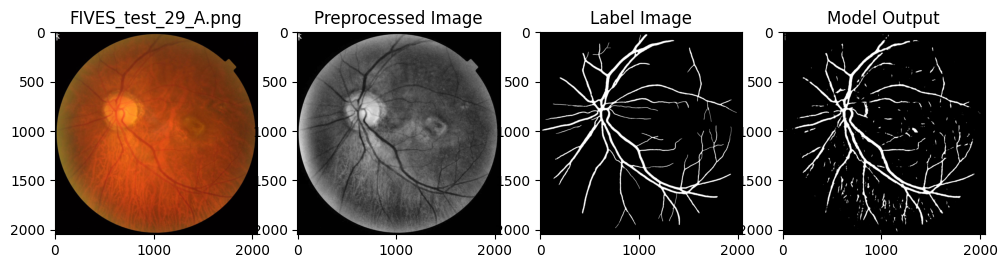

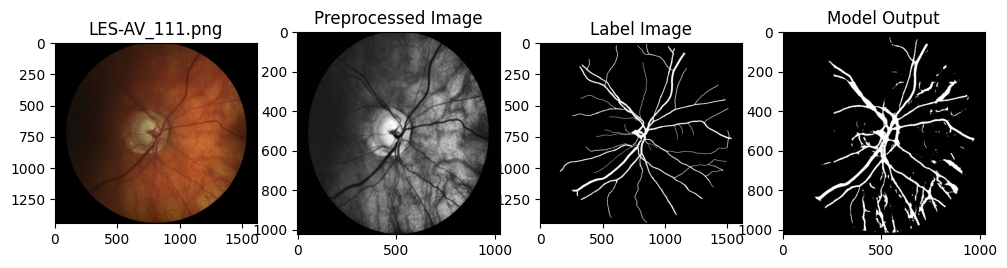

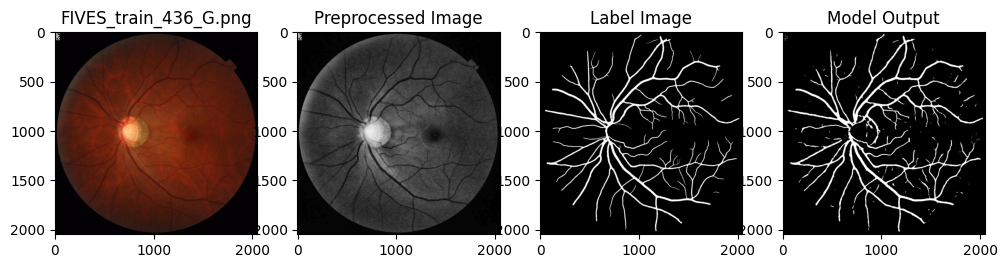

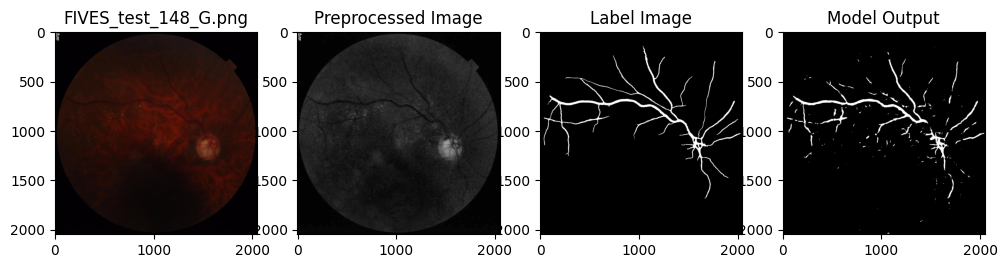

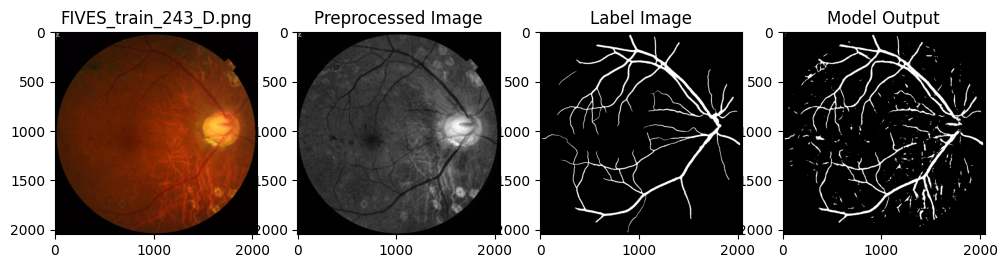

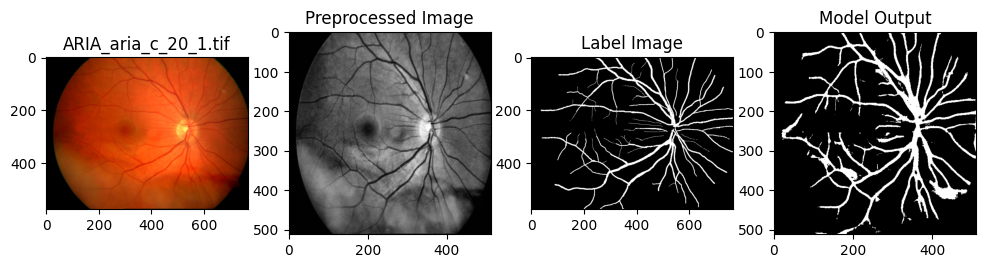

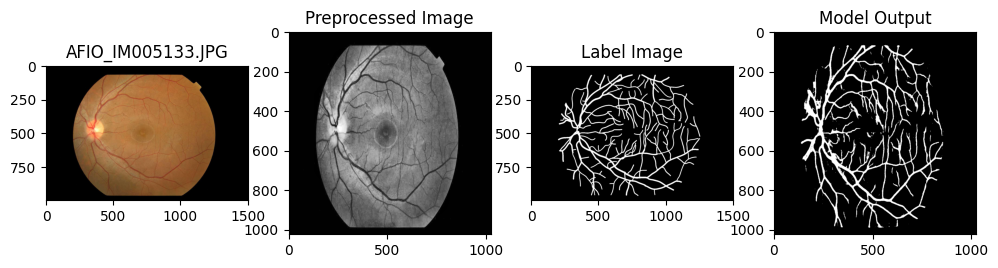

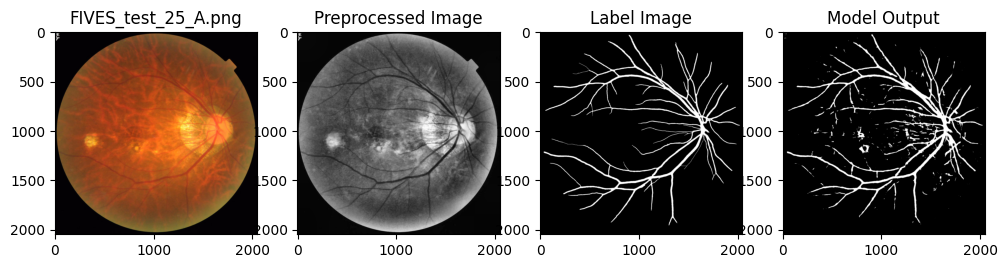

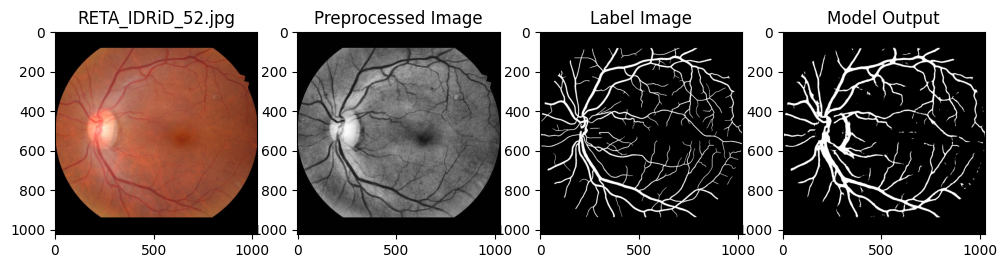

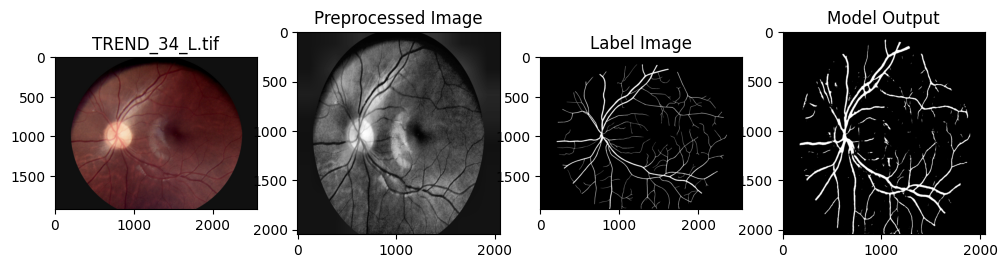

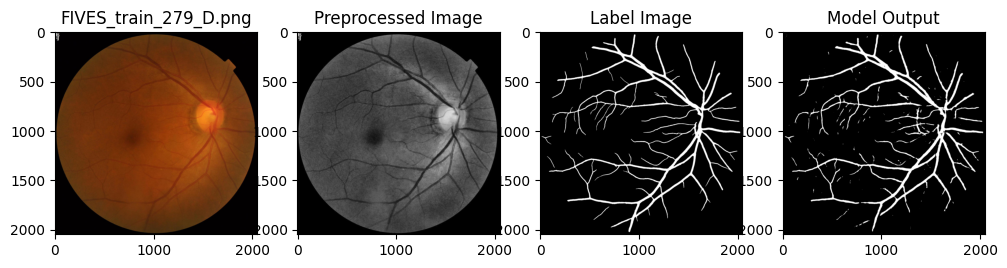

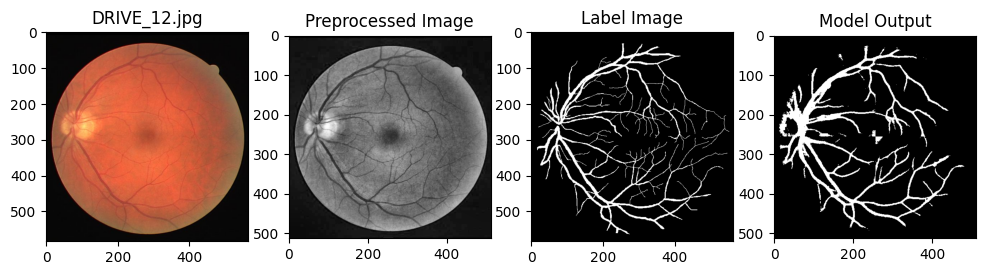

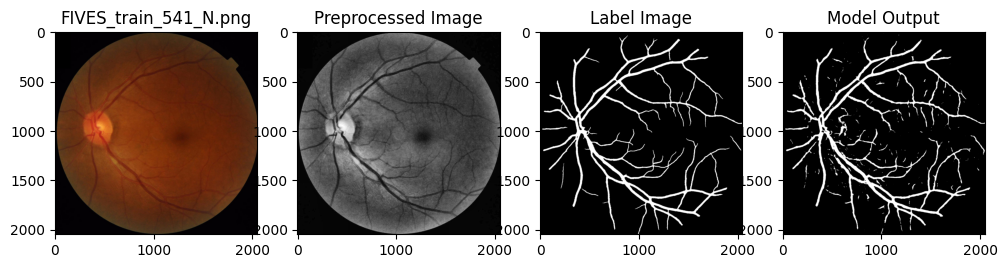

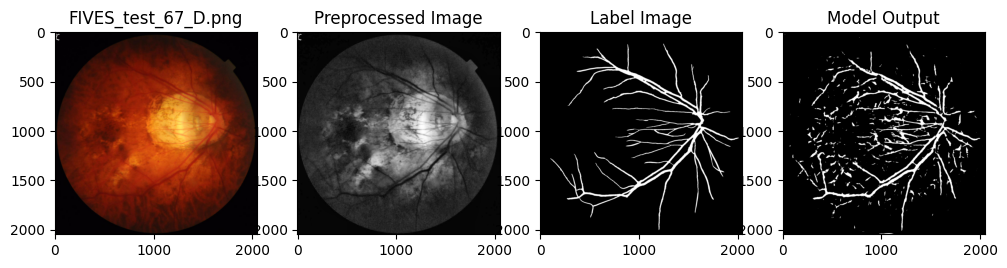

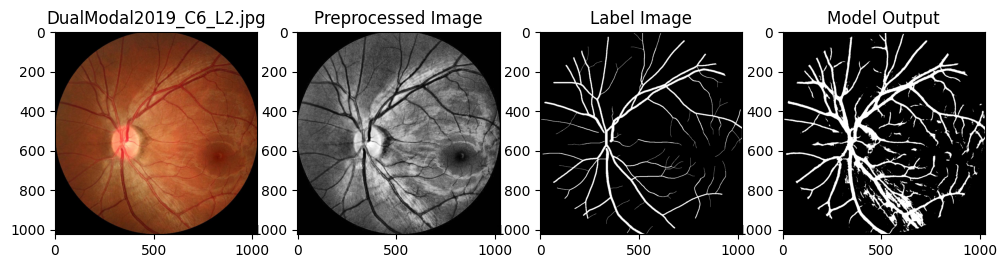

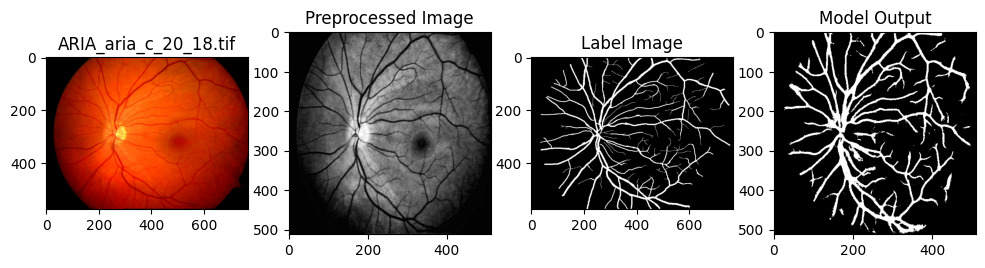

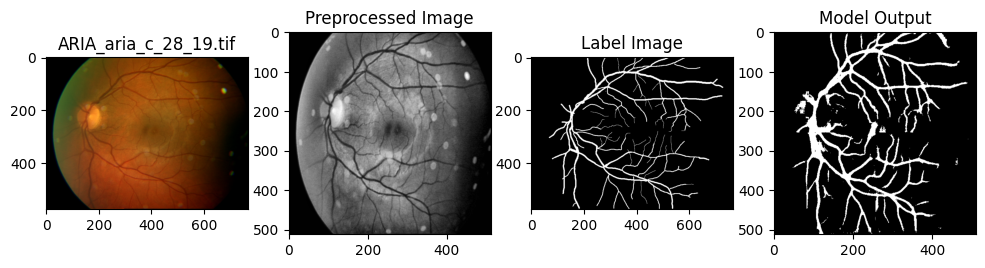

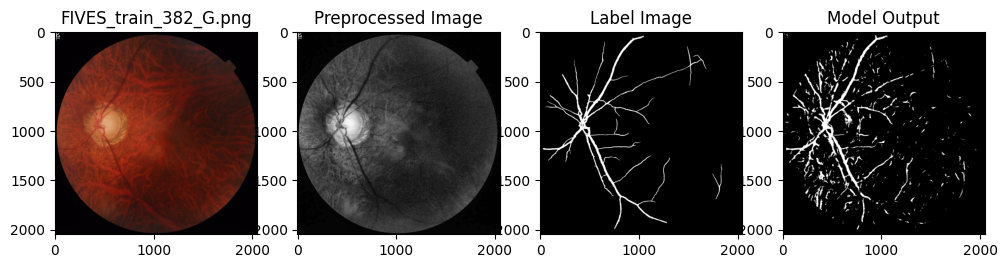

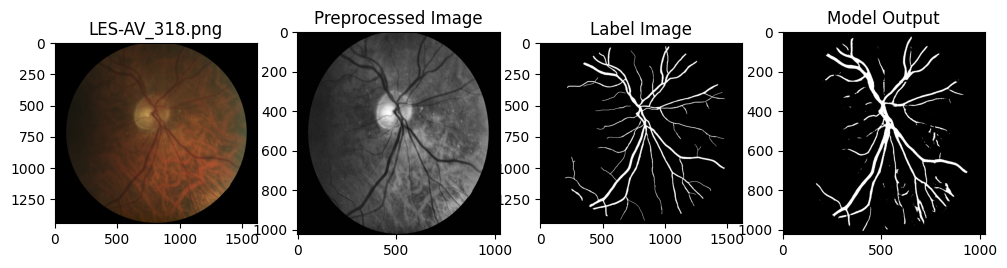

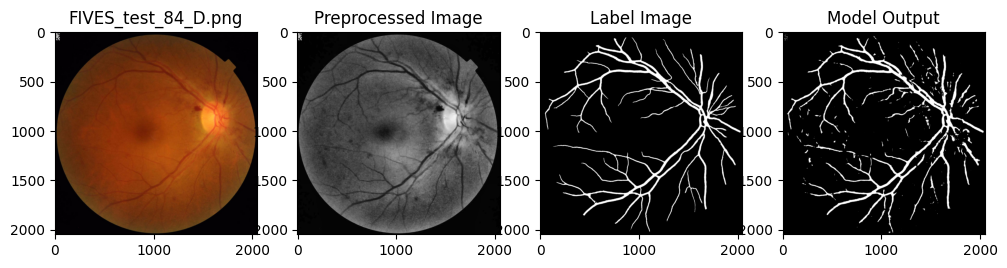

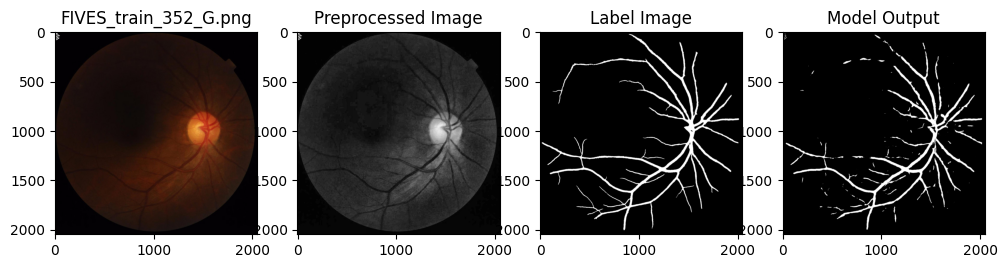

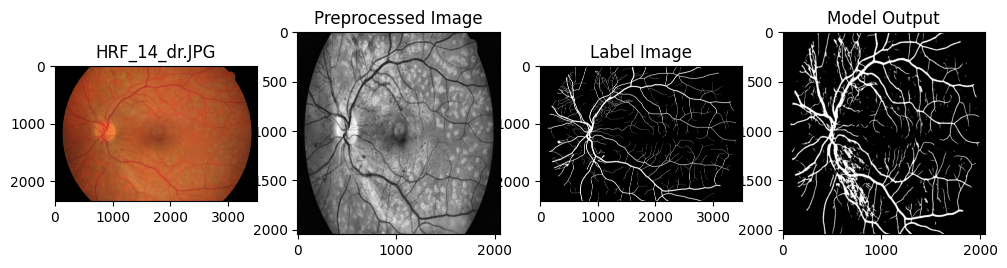

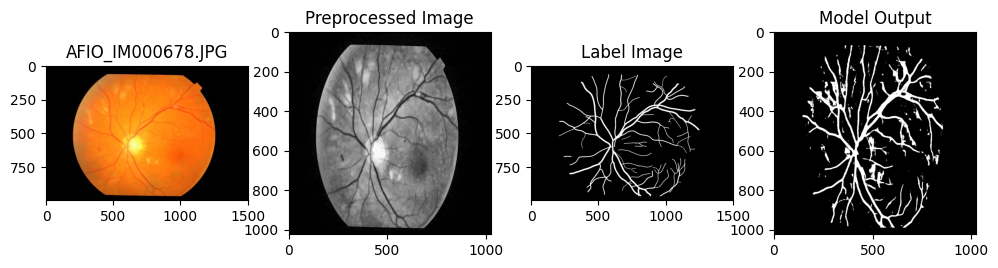

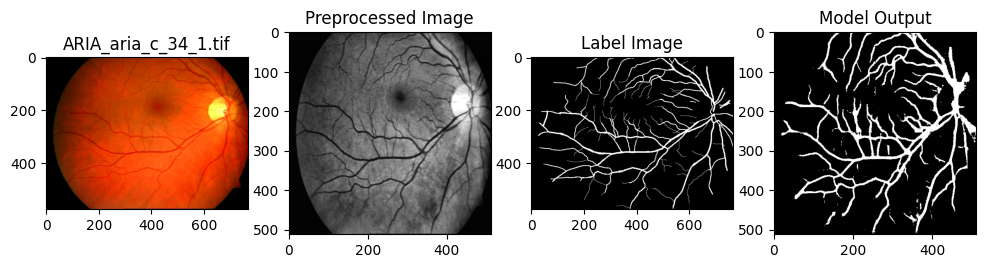

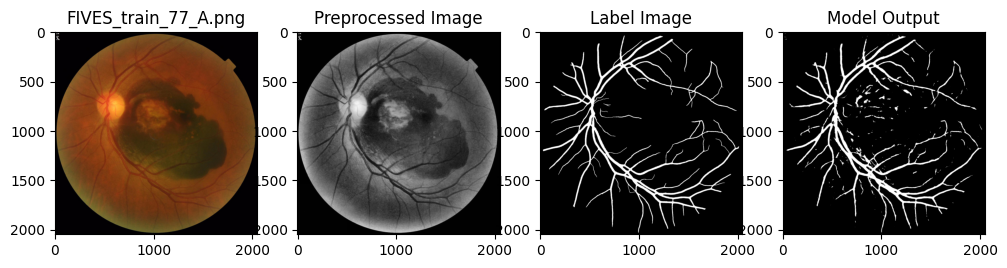

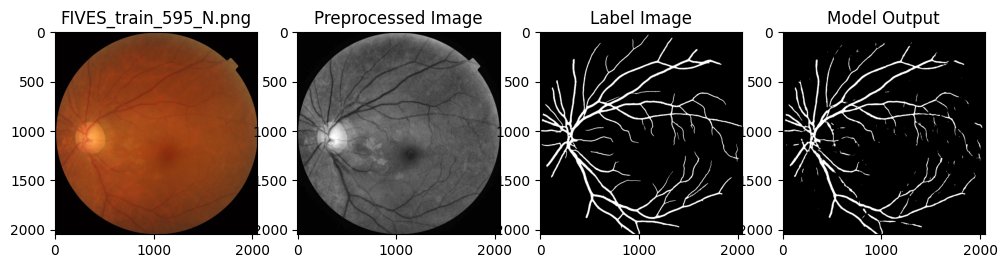

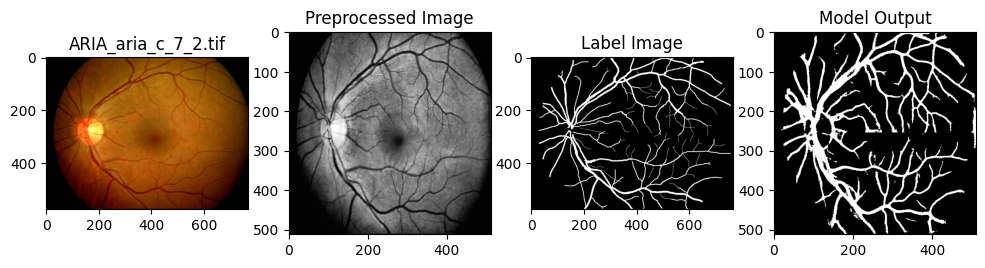

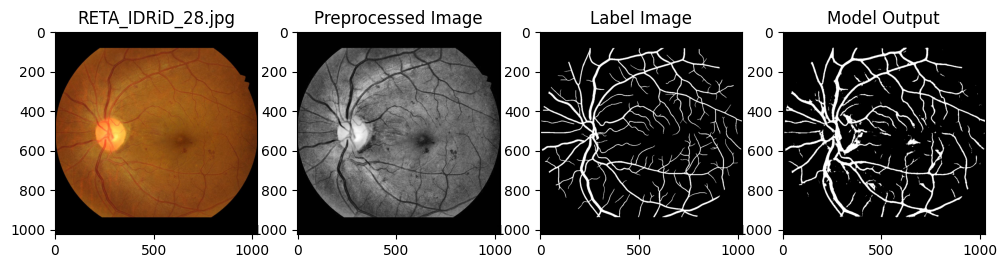

: 

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot model result
num_images_to_select = 30
check_result.visualize_PG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)